# Big Mart Sales Prediction

### Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline

### importing the dataset

In [2]:
# importing the test and train csv files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
## Data exploration of Train Data

In [4]:
print('dimension of train set are {}\ndimension of test set are {}\n'.format(train.shape,test.shape))

dimension of train set are (8523, 12)
dimension of test set are (5681, 11)



In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
## Extracting X and y from train dataset
X = train.iloc[:,0:-1]
y =train['Item_Outlet_Sales']
print("Xtrain shape is {}\nytrain shape is {}\n".format(X.shape,y.shape))

Xtrain shape is (8523, 11)
ytrain shape is (8523,)



In [9]:
# Outlet_Establishment_year does not carry any significance so adding the age of Outlet
# adding extra feature of Outlet_Age = max(Outlet_Establishment_Year)-(Outlet_Establishment_year)
X['Outlet_Age']=X['Outlet_Establishment_Year'].max() - X['Outlet_Establishment_Year']

In [10]:
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,10
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,10
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,11
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,22


In [11]:
# at first droping item identifier , outlet_identifier , outlet establishment year
X = X.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [12]:
### Item visibilty of 0 does not make any sense so imputing these 0 values with nan

In [13]:
X['Item_Visibility']=X['Item_Visibility'].mask(X['Item_Visibility']==0.0)

In [14]:
# missing values
X.isna().sum()

Item_Weight             1463
Item_Fat_Content           0
Item_Visibility          526
Item_Type                  0
Item_MRP                   0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Outlet_Age                 0
dtype: int64

In [15]:
### missing values imputation

In [16]:
X['Item_Weight'].fillna(X['Item_Weight'].mean(),inplace=True)
X['Outlet_Size'].fillna(X['Outlet_Size'].mode()[0],inplace=True)
X['Item_Visibility'].fillna(X['Item_Visibility'].mean(),inplace=True)

In [17]:
X.isna().sum()


Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Outlet_Age              0
dtype: int64

In [18]:
# checking the categorical variables
X['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [19]:
# Unifying categories to Low Fat and Regular only
X['Item_Fat_Content'] = X['Item_Fat_Content'].replace({'reg':'Regular', 'LF':'Low Fat','low fat':'Low Fat'})

In [20]:
X['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [21]:
# Label encoding the categorical variables.

In [22]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
X['Item_Fat_Content']=label_encoder.fit_transform(X['Item_Fat_Content']) 
#,'Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'
X['Outlet_Size']=label_encoder.fit_transform(X['Outlet_Size'])
X['Outlet_Location_Type']=label_encoder.fit_transform(X['Outlet_Location_Type'])
X['Outlet_Type']=label_encoder.fit_transform(X['Outlet_Type'])
X['Item_Type']=label_encoder.fit_transform(X['Item_Type'])
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,9.30,0,0.016047,4,249.8092,1,0,1,10
1,5.92,1,0.019278,14,48.2692,1,2,2,0
2,17.50,0,0.016760,10,141.6180,1,0,1,10
3,19.20,1,0.070482,6,182.0950,1,2,0,11
4,8.93,0,0.070482,9,53.8614,0,2,1,22


In [23]:
### checking correlation to check if there is any highly correlated variable
X.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
Item_Weight,1.000000,-0.021157,-0.017763,0.028015,0.024756,-0.007225,0.004088,-0.000566,0.008301
Item_Fat_Content,-0.021157,1.000000,0.049915,-0.139434,0.006063,-0.000622,-0.001598,0.002199,-0.003151
Item_Visibility,-0.017763,0.049915,1.000000,-0.035922,-0.005515,0.072297,-0.027742,-0.179380,0.078316
Item_Type,0.028015,-0.139434,-0.035922,1.000000,0.032651,-0.001859,0.003084,0.003053,-0.004970
Item_MRP,0.024756,0.006063,-0.005515,0.032651,1.000000,0.006059,0.000232,-0.001975,-0.005020
Outlet_Size,-0.007225,-0.000622,0.072297,-0.001859,0.006059,1.000000,-0.614311,-0.201483,-0.193389
Outlet_Location_Type,0.004088,-0.001598,-0.027742,0.003084,0.000232,-0.614311,1.000000,0.467219,0.089216
Outlet_Type,-0.000566,0.002199,-0.179380,0.003053,-0.001975,-0.201483,0.467219,1.000000,0.122304
Outlet_Age,0.008301,-0.003151,0.078316,-0.004970,-0.005020,-0.193389,0.089216,0.122304,1.000000


In [24]:
print("X shape is {} \ny shape is {} \n".format(X.shape,y.shape))

X shape is (8523, 9) 
y shape is (8523,) 



In [25]:
#normalizing the X from 0 to 1 using MinMaxScalar
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
X=min_max_scaler.fit_transform(X)
X[:5]

array([[0.28252456, 0.        , 0.03839895, 0.26666667, 0.92750715,
        0.5       , 0.        , 0.33333333, 0.41666667],
       [0.08127419, 1.        , 0.04834585, 0.93333333, 0.0720684 ,
        0.5       , 1.        , 0.66666667, 0.        ],
       [0.77076511, 0.        , 0.04059334, 0.66666667, 0.46828841,
        0.5       , 0.        , 0.33333333, 0.41666667],
       [0.87198571, 1.        , 0.20598459, 0.4       , 0.64009348,
        0.5       , 1.        , 0.        , 0.45833333],
       [0.26049419, 0.        , 0.20598459, 0.6       , 0.09580456,
        0.        , 1.        , 0.33333333, 0.91666667]])

In [26]:
# Test Train split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size = 0.3 ,shuffle = True,random_state =0)
print(X_train.shape,y_train.shape);print(X_test.shape,y_test.shape)

(5966, 9) (5966,)
(2557, 9) (2557,)


In [27]:
# Building the Model using Keras
from keras.models import Sequential
# importing different layers from keras
from keras.layers import InputLayer, Dense , Dropout
from keras.optimizers import Adam,RMSprop
from keras.regularizers import l2

Using TensorFlow backend.


In [28]:
# defining the input and output neurons
input_neurons = X_train.shape[1]
output_neurons = 1

In [29]:
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=500,activation='relu',name='Input_Layer1'))
model.add(Dense(units=100,activation='relu',name='hidden_Layer1'))
model.add(Dropout(0.5))
model.add(Dense(units=50,activation='relu',name='hidden_Layer2'))
model.add(Dense(units=output_neurons,activation='linear',name ='output_Layer'))

model.compile(loss= "mse" , optimizer="RMSprop", metrics=["mae"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer1 (Dense)         (None, 500)               5000      
_________________________________________________________________
hidden_Layer1 (Dense)        (None, 100)               50100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
hidden_Layer2 (Dense)        (None, 50)                5050      
_________________________________________________________________
output_Layer (Dense)         (None, 1)                 51        
Total params: 60,201
Trainable params: 60,201
Non-trainable params: 0
_________________________________________________________________


In [30]:
# model = Sequential()
# model.add(InputLayer(input_shape=(input_neurons,)))
# model.add(Dense(units=64,activation='relu'))
# model.add(Dense(units=32,activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(units=16,activation='relu'))
# model.add(Dense(units=output_neurons,activation='linear'))
# learning_rate = 0.01
# opt=RMSprop(lr=learning_rate)
# #model.compile(loss='MSE', optimizer='Adam',metrics=['MAE'])
# model.compile(optimizer=opt, loss='mse', metrics=['mae'])

In [32]:
# removing history from memory
#del history
# training the model
history = model.fit(X_train, y_train, epochs=500, batch_size=1024,validation_data =(X_test,y_test), verbose=1)

Train on 5966 samples, validate on 2557 samples
Epoch 1/500
5966/5966 [==============================] - 0s 49us/step - loss: 7544587.2746 - mae: 2165.8406 - val_loss: 7921720.4388 - val_mae: 2208.4885
Epoch 2/500
5966/5966 [==============================] - 0s 24us/step - loss: 7509492.3909 - mae: 2157.9600 - val_loss: 7861282.8221 - val_mae: 2195.3286
Epoch 3/500
5966/5966 [==============================] - 0s 22us/step - loss: 7429547.3711 - mae: 2140.0586 - val_loss: 7743968.6738 - val_mae: 2169.6372
Epoch 4/500
5966/5966 [==============================] - 0s 24us/step - loss: 7289759.6589 - mae: 2108.5864 - val_loss: 7561933.8852 - val_mae: 2129.4370
Epoch 5/500
5966/5966 [==============================] - 0s 23us/step - loss: 7086440.0789 - mae: 2062.9260 - val_loss: 7309309.5909 - val_mae: 2073.8071
Epoch 6/500
5966/5966 [==============================] - 0s 23us/step - loss: 6807152.1968 - mae: 2001.5012 - val_loss: 6983695.3516 - val_mae: 2004.6998
Epoch 7/500
5966/5966 [=====

Epoch 54/500
5966/5966 [==============================] - 0s 23us/step - loss: 1506107.8445 - mae: 896.8900 - val_loss: 1488737.7285 - val_mae: 909.2889
Epoch 55/500
5966/5966 [==============================] - 0s 21us/step - loss: 1512648.0486 - mae: 896.3821 - val_loss: 1485503.5084 - val_mae: 907.6118
Epoch 56/500
5966/5966 [==============================] - 0s 22us/step - loss: 1488919.1427 - mae: 890.0475 - val_loss: 1477199.6053 - val_mae: 910.1840
Epoch 57/500
5966/5966 [==============================] - 0s 20us/step - loss: 1471449.0013 - mae: 882.2944 - val_loss: 1475761.9400 - val_mae: 913.7120
Epoch 58/500
5966/5966 [==============================] - 0s 21us/step - loss: 1519884.5031 - mae: 902.8643 - val_loss: 1484469.5580 - val_mae: 902.6082
Epoch 59/500
5966/5966 [==============================] - 0s 21us/step - loss: 1500851.7509 - mae: 890.8807 - val_loss: 1472401.9093 - val_mae: 905.9699
Epoch 60/500
5966/5966 [==============================] - 0s 21us/step - loss: 149

5966/5966 [==============================] - 0s 22us/step - loss: 1399916.1152 - mae: 848.2203 - val_loss: 1377967.0067 - val_mae: 866.5619
Epoch 108/500
5966/5966 [==============================] - 0s 21us/step - loss: 1400090.0231 - mae: 853.8317 - val_loss: 1385260.2901 - val_mae: 858.2101
Epoch 109/500
5966/5966 [==============================] - 0s 22us/step - loss: 1415723.3326 - mae: 852.6198 - val_loss: 1372715.7347 - val_mae: 863.6205
Epoch 110/500
5966/5966 [==============================] - 0s 21us/step - loss: 1416698.5641 - mae: 858.3204 - val_loss: 1386552.8657 - val_mae: 855.4785
Epoch 111/500
5966/5966 [==============================] - 0s 21us/step - loss: 1388144.5678 - mae: 850.4495 - val_loss: 1379368.9951 - val_mae: 855.1398
Epoch 112/500
5966/5966 [==============================] - 0s 23us/step - loss: 1389919.9614 - mae: 847.7507 - val_loss: 1373172.0815 - val_mae: 853.7889
Epoch 113/500
5966/5966 [==============================] - 0s 23us/step - loss: 1397327.11

5966/5966 [==============================] - 0s 24us/step - loss: 1344360.7873 - mae: 819.9084 - val_loss: 1266960.2028 - val_mae: 811.8923
Epoch 161/500
5966/5966 [==============================] - 0s 26us/step - loss: 1307839.9867 - mae: 812.6419 - val_loss: 1280134.3107 - val_mae: 807.6174
Epoch 162/500
5966/5966 [==============================] - 0s 23us/step - loss: 1325701.5812 - mae: 811.6516 - val_loss: 1267023.7917 - val_mae: 820.6387
Epoch 163/500
5966/5966 [==============================] - 0s 21us/step - loss: 1328449.9543 - mae: 815.0185 - val_loss: 1270996.0835 - val_mae: 808.1491
Epoch 164/500
5966/5966 [==============================] - 0s 23us/step - loss: 1319466.5841 - mae: 815.0834 - val_loss: 1270719.1894 - val_mae: 806.0656
Epoch 165/500
5966/5966 [==============================] - 0s 23us/step - loss: 1325912.5016 - mae: 814.3154 - val_loss: 1265970.2006 - val_mae: 807.3861
Epoch 166/500
5966/5966 [==============================] - 0s 21us/step - loss: 1293400.62

5966/5966 [==============================] - 0s 26us/step - loss: 1274588.0504 - mae: 794.7204 - val_loss: 1227376.6563 - val_mae: 786.7883
Epoch 214/500
5966/5966 [==============================] - 0s 25us/step - loss: 1292247.0876 - mae: 803.4409 - val_loss: 1232761.6148 - val_mae: 787.1241
Epoch 215/500
5966/5966 [==============================] - 0s 27us/step - loss: 1291737.0304 - mae: 802.0869 - val_loss: 1217441.5719 - val_mae: 787.9802
Epoch 216/500
5966/5966 [==============================] - 0s 27us/step - loss: 1289498.4048 - mae: 802.8897 - val_loss: 1214770.4631 - val_mae: 792.6805
Epoch 217/500
5966/5966 [==============================] - 0s 28us/step - loss: 1267436.7268 - mae: 799.9814 - val_loss: 1224869.0061 - val_mae: 785.1658
Epoch 218/500
5966/5966 [==============================] - 0s 25us/step - loss: 1276165.8856 - mae: 794.9644 - val_loss: 1239848.3900 - val_mae: 787.5087
Epoch 219/500
5966/5966 [==============================] - 0s 26us/step - loss: 1272989.81

5966/5966 [==============================] - 0s 34us/step - loss: 1273616.2612 - mae: 792.4587 - val_loss: 1208333.9809 - val_mae: 784.7316
Epoch 267/500
5966/5966 [==============================] - 0s 26us/step - loss: 1290434.3395 - mae: 792.9429 - val_loss: 1208535.0501 - val_mae: 784.1066
Epoch 268/500
5966/5966 [==============================] - 0s 26us/step - loss: 1272004.2836 - mae: 797.8976 - val_loss: 1231550.6554 - val_mae: 782.0245
Epoch 269/500
5966/5966 [==============================] - 0s 26us/step - loss: 1273626.3200 - mae: 795.7040 - val_loss: 1223188.0876 - val_mae: 781.9368
Epoch 270/500
5966/5966 [==============================] - 0s 24us/step - loss: 1248801.3274 - mae: 789.3261 - val_loss: 1208692.1360 - val_mae: 783.3065
Epoch 271/500
5966/5966 [==============================] - 0s 26us/step - loss: 1281377.7401 - mae: 794.6565 - val_loss: 1227173.4808 - val_mae: 782.7171
Epoch 272/500
5966/5966 [==============================] - 0s 24us/step - loss: 1260517.70

5966/5966 [==============================] - 0s 23us/step - loss: 1260174.6530 - mae: 788.5649 - val_loss: 1208948.7672 - val_mae: 778.3814
Epoch 320/500
5966/5966 [==============================] - 0s 22us/step - loss: 1277742.3350 - mae: 790.3383 - val_loss: 1215960.5972 - val_mae: 779.0904
Epoch 321/500
5966/5966 [==============================] - 0s 23us/step - loss: 1280157.6637 - mae: 791.3013 - val_loss: 1211290.0797 - val_mae: 779.0030
Epoch 322/500
5966/5966 [==============================] - 0s 25us/step - loss: 1272623.4224 - mae: 786.4649 - val_loss: 1221944.6599 - val_mae: 778.7141
Epoch 323/500
5966/5966 [==============================] - 0s 21us/step - loss: 1250910.9495 - mae: 785.6523 - val_loss: 1216341.3220 - val_mae: 778.5579
Epoch 324/500
5966/5966 [==============================] - 0s 26us/step - loss: 1275458.7358 - mae: 794.4836 - val_loss: 1204270.8827 - val_mae: 781.2834
Epoch 325/500
5966/5966 [==============================] - 0s 27us/step - loss: 1275370.13

Epoch 372/500
5966/5966 [==============================] - 0s 21us/step - loss: 1270974.7089 - mae: 789.0672 - val_loss: 1225348.2505 - val_mae: 776.9722
Epoch 373/500
5966/5966 [==============================] - 0s 21us/step - loss: 1259527.9311 - mae: 785.1630 - val_loss: 1207095.7552 - val_mae: 776.5414
Epoch 374/500
5966/5966 [==============================] - 0s 22us/step - loss: 1240216.5386 - mae: 783.5970 - val_loss: 1210937.1434 - val_mae: 775.8820
Epoch 375/500
5966/5966 [==============================] - 0s 23us/step - loss: 1268807.6989 - mae: 786.0464 - val_loss: 1205057.0497 - val_mae: 777.5996
Epoch 376/500
5966/5966 [==============================] - 0s 22us/step - loss: 1244061.1060 - mae: 784.4095 - val_loss: 1209554.8930 - val_mae: 777.9265
Epoch 377/500
5966/5966 [==============================] - 0s 21us/step - loss: 1276699.4807 - mae: 788.4628 - val_loss: 1222324.6998 - val_mae: 778.0969
Epoch 378/500
5966/5966 [==============================] - 0s 22us/step - lo

5966/5966 [==============================] - 0s 24us/step - loss: 1264444.5054 - mae: 782.6129 - val_loss: 1234296.4571 - val_mae: 777.5394
Epoch 426/500
5966/5966 [==============================] - 0s 21us/step - loss: 1265758.5357 - mae: 785.1505 - val_loss: 1220364.4414 - val_mae: 776.5421
Epoch 427/500
5966/5966 [==============================] - 0s 21us/step - loss: 1268912.9863 - mae: 786.1226 - val_loss: 1253831.0384 - val_mae: 781.3971
Epoch 428/500
5966/5966 [==============================] - 0s 21us/step - loss: 1251891.4982 - mae: 779.5865 - val_loss: 1206513.0191 - val_mae: 774.8058
Epoch 429/500
5966/5966 [==============================] - 0s 21us/step - loss: 1237055.2003 - mae: 776.5234 - val_loss: 1220717.2306 - val_mae: 774.1125
Epoch 430/500
5966/5966 [==============================] - 0s 20us/step - loss: 1224610.2038 - mae: 778.4106 - val_loss: 1204331.5481 - val_mae: 786.5201
Epoch 431/500
5966/5966 [==============================] - 0s 22us/step - loss: 1264867.63

5966/5966 [==============================] - 0s 22us/step - loss: 1260218.0072 - mae: 783.9628 - val_loss: 1210183.0784 - val_mae: 774.5219
Epoch 479/500
5966/5966 [==============================] - 0s 20us/step - loss: 1262389.9168 - mae: 789.3973 - val_loss: 1238910.8594 - val_mae: 778.5247
Epoch 480/500
5966/5966 [==============================] - 0s 22us/step - loss: 1270230.0192 - mae: 788.1235 - val_loss: 1209667.7158 - val_mae: 775.2348
Epoch 481/500
5966/5966 [==============================] - 0s 22us/step - loss: 1248610.1297 - mae: 781.9518 - val_loss: 1206592.9029 - val_mae: 774.0880
Epoch 482/500
5966/5966 [==============================] - 0s 20us/step - loss: 1251523.6665 - mae: 779.4933 - val_loss: 1202214.7686 - val_mae: 775.9185
Epoch 483/500
5966/5966 [==============================] - 0s 22us/step - loss: 1234313.6506 - mae: 778.2354 - val_loss: 1202146.9052 - val_mae: 775.2466
Epoch 484/500
5966/5966 [==============================] - 0s 22us/step - loss: 1251748.28

In [33]:
pred_train= model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

1070.2234949921694


In [34]:
model.evaluate(X_train,y_train)

5966/5966 [==============================] - 0s 36us/step


[1145378.327103587, 739.8389282226562]

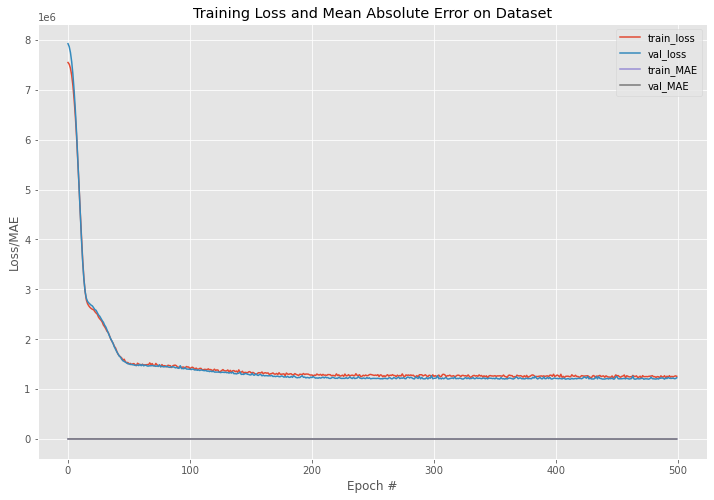

In [35]:
# plot the training loss and accuracy
N = np.arange(0, 500)
plt.style.use("ggplot")
plt.figure(figsize=(12, 8))
#plt.figure(figure)
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["mae"], label="train_MAE")
plt.plot(N, history.history["val_mae"], label="val_MAE")
plt.title("Training Loss and Mean Absolute Error on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/MAE")
plt.legend(loc="upper right")
#plt.savefig(args["plot"])

In [36]:
# Applying the same transformations to test dataset
# Outlet_Establishment_year does not carry any significance so adding the age of Outlet
# adding extra feature of Outlet_Age = max(Outlet_Establishment_Year)-(Outlet_Establishment_year)
test['Outlet_Age']=test['Outlet_Establishment_Year'].max() - test['Outlet_Establishment_Year']

In [37]:
submission = test[['Item_Identifier','Outlet_Identifier']].copy()

In [38]:
# at first droping item identifier , outlet_identifier , outlet establishment year
test = test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [39]:
test['Item_Visibility']=test['Item_Visibility'].mask(test['Item_Visibility']==0.0)

In [40]:
test.isna().sum()

Item_Weight              976
Item_Fat_Content           0
Item_Visibility          353
Item_Type                  0
Item_MRP                   0
Outlet_Size             1606
Outlet_Location_Type       0
Outlet_Type                0
Outlet_Age                 0
dtype: int64

In [41]:
test['Item_Weight'].fillna(test['Item_Weight'].mean(),inplace=True)
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0],inplace=True)
test['Item_Visibility'].fillna(test['Item_Visibility'].mean(),inplace=True)

In [42]:
# checking the categorical variables
test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [43]:
# Unifying categories to Low Fat and Regular only
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'reg':'Regular', 'LF':'Low Fat','low fat':'Low Fat'})

In [44]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
test['Item_Fat_Content']=label_encoder.fit_transform(test['Item_Fat_Content']) 
#,'Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'
test['Outlet_Size']=label_encoder.fit_transform(test['Outlet_Size'])
test['Outlet_Location_Type']=label_encoder.fit_transform(test['Outlet_Location_Type'])
test['Outlet_Type']=label_encoder.fit_transform(test['Outlet_Type'])
test['Item_Type']=label_encoder.fit_transform(test['Item_Type'])
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,20.750000,0,0.007565,13,107.8622,1,0,1,10
1,8.300000,1,0.038428,4,87.3198,1,1,1,2
2,14.600000,0,0.099575,11,241.7538,1,2,0,11
3,7.315000,0,0.015388,13,155.0340,1,1,1,2
4,12.695633,1,0.118599,4,234.2300,1,2,3,24


In [45]:
#normalizing the test from 0 to 1 using MinMaxScalar
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
test=min_max_scaler.fit_transform(test)
test[:5]

array([[0.96427508, 0.        , 0.01241517, 0.86666667, 0.32341312,
        0.5       , 0.        , 0.33333333, 0.41666667],
       [0.22298303, 1.        , 0.10884773, 0.26666667, 0.23584901,
        0.5       , 0.5       , 0.33333333, 0.08333333],
       [0.59809467, 0.        , 0.29990547, 0.73333333, 0.89413994,
        0.5       , 1.        , 0.        , 0.45833333],
       [0.16433462, 0.        , 0.03686028, 0.86666667, 0.52448781,
        0.5       , 0.5       , 0.33333333, 0.08333333],
       [0.48470577, 1.        , 0.35934822, 0.26666667, 0.86206897,
        0.5       , 1.        , 1.        , 1.        ]])

In [46]:
predictions = model.predict(test)

In [47]:
submission['Item_Outlet_Sales']=predictions
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1671.079834
1,FDW14,OUT017,1391.820312
2,NCN55,OUT010,631.308472
3,FDQ58,OUT017,2471.795898
4,FDY38,OUT027,5553.149414
...,...,...,...
5676,FDB58,OUT046,2295.564453
5677,FDD47,OUT018,2407.322021
5678,NCO17,OUT045,1518.888306
5679,FDJ26,OUT017,3412.813721


In [48]:
submission.to_csv('submission.csv',index=False)